In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Establishing dataframes to be explored

In [2]:
reviews_df = pd.read_csv('reviews.csv')
playbill_df = pd.read_csv('playbill.csv')

In [3]:
showavg = playbill_df.groupby('show_title').mean().round(2)

Just to get to know my dataframes better I'll be sorting them by different values, which will also let me double check that the cleaning and wrangling I did was enough.

### Top Shows

##### By weekly gross

In [4]:
showavg.sort_values(by='week_gross', ascending=False).head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Hamilton,2018.83,2503591.32,235.86,628.92,10598.79,1322.13,7.89,100.64
Springsteen On Broadway,2017.77,2174210.53,505.90,505.90,4299.71,947.54,4.40,99.99
Morrissey,2019.00,1881374.00,186.55,397.00,10085.00,1495.00,7.00,96.37
El Mago Pop,2023.00,1670913.00,164.90,317.50,9054.00,1018.00,7.00,91.97
Wicked,2012.68,1615595.98,113.33,265.51,14206.44,1827.69,7.99,96.97
To Kill A Mockingbird,2019.40,1604341.86,143.86,423.30,11031.69,1435.12,7.24,98.84
Jonas Brothers,2023.00,1556128.00,192.35,192.35,8090.00,1618.00,5.00,100.00
Harry Potter and the Cursed Child,2020.46,1548985.23,127.71,290.03,12115.53,1615.76,7.60,95.05
Dave Chappelle Live on Broadway,2019.00,1534756.00,212.44,748.00,6706.50,1504.00,5.00,98.90


I'm not surprised that Hamilton is at the top; what I am surprised about though is that in the midst of the late 2010's and early 2020's there's Wicked in 2012/2013 holding the 5th highest spot.

We have 5 'other' genre shows, 3 musicals, and 2 plays. El Mago Pop really stood out to me - a magic show holding the fourth highest weekly gross! 

##### By average ticket price

In [5]:
showavg.sort_values(by='avg_ticket', ascending=False).head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Springsteen On Broadway,2017.77,2174210.53,505.90,505.90,4299.71,947.54,4.40,99.99
Hamilton,2018.83,2503591.32,235.86,628.92,10598.79,1322.13,7.89,100.64
Merrily We Roll Along,2023.00,1304508.00,225.07,499.00,5796.00,966.00,0.00,100.00
Dave Chappelle Live on Broadway,2019.00,1534756.00,212.44,748.00,6706.50,1504.00,5.00,98.90
Plaza Suite,2022.00,1442841.76,207.26,499.81,6988.15,975.00,5.50,98.56
Mel Brooks on Broadway,2019.00,583140.00,196.54,297.00,2967.00,1495.00,2.00,99.23
Jonas Brothers,2023.00,1556128.00,192.35,192.35,8090.00,1618.00,5.00,100.00
Morrissey,2019.00,1881374.00,186.55,397.00,10085.00,1495.00,7.00,96.37
Funny Girl,2022.47,1437019.55,164.93,164.93,8579.86,1219.00,7.49,89.48


4 of these shows didn't appear in the top weekly gross list, which is unfortuante considering the high ticket price.

Our genre breakdown has stayed the same with 5 'other' genre shows, 3 musicals, and 2 plays.

##### By top ticket price

In [6]:
showavg.sort_values(by='top_ticket', ascending=False).head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Dave Chappelle Live on Broadway,2019.00,1534756.00,212.44,748.00,6706.50,1504.00,5.00,98.90
Manilow on Broadway,2013.00,693452.67,120.98,700.00,5905.33,1631.00,4.17,81.26
Hamilton,2018.83,2503591.32,235.86,628.92,10598.79,1322.13,7.89,100.64
"Hello, Dolly!",2013.59,1463679.94,136.85,510.66,10390.57,1441.39,7.24,93.49
Springsteen On Broadway,2017.77,2174210.53,505.90,505.90,4299.71,947.54,4.40,99.99
Plaza Suite,2022.00,1442841.76,207.26,499.81,6988.15,975.00,5.50,98.56
Merrily We Roll Along,2023.00,1304508.00,225.07,499.00,5796.00,966.00,0.00,100.00
Kristin Chenoweth: For The Girls,2019.00,969894.00,101.20,473.00,9584.00,1198.00,8.00,100.00
Manilow Broadway,2019.00,866512.15,160.66,447.00,5411.75,1504.00,4.25,84.40


I'm very surprised at these results - with how popular Hamilton has been, I was fully expecting it to be number one in this list. Another surprise is that we have two entries of (essentially) the same show - Manilow on Broadway in 2013 and Manilow Broadway in 2019.

Our genre breakdown continues to stay the same - whether this actually means something about popularity is yet to be seen.

### Bottom Shows

I don't have a lot to say about the results for these first few dataframes because I don't recognize any of the shows, so I'll just provide the genre list for each one.

##### By weekly gross

In [7]:
showavg.sort_values(by='week_gross').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
A Mom's Life,1998.00,3874.33,25.56,40.00,148.00,1004.0,1.00,14.74
Senator Joe,1989.00,5661.00,12.04,12.04,470.00,1334.0,0.00,11.74
"Mummenschanz: ""The New Show""",1986.00,10000.00,8.33,8.33,1200.00,499.0,8.00,30.06
Marc Salem's Mind Games on Broadway,2004.00,11995.71,42.98,56.26,286.08,712.0,1.25,36.14
So Long on Lonely Street,1986.00,14957.38,11.80,11.80,1414.12,499.0,6.62,37.70
A Change in the Heir,1990.00,17151.40,10.16,10.16,1609.00,499.0,4.60,41.70
Stand-Up Tragedy,1990.00,18581.50,19.06,19.06,1064.50,499.0,3.25,35.34
Oh Coward!,1986.11,20555.56,11.42,11.42,1800.00,499.0,6.22,45.09
As Long as We Both Shall Laugh,2003.00,23605.50,24.35,65.00,1018.36,740.0,1.07,79.68


The breakdown for this list is: 3 plays, 3 musicals, and 4 'other' genre shows.

##### By average ticket price

In [8]:
showavg.sort_values(by='avg_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
"Mummenschanz: ""The New Show""",1986.00,10000.00,8.33,8.33,1200.00,499.0,8.00,30.06
Mort Sahl on Broadway!,1987.00,48203.75,8.82,8.82,5582.25,1336.0,6.50,56.16
The Cemetery Club,1990.00,42441.00,9.71,9.71,4654.00,1090.0,6.00,53.37
Danny Gans on Broadway: The Man of Many Voices,1995.00,42181.00,10.11,40.00,4135.50,1346.0,3.00,36.04
A Change in the Heir,1990.00,17151.40,10.16,10.16,1609.00,499.0,4.60,41.70
Miss Margarida's Way,1990.00,29349.33,10.51,10.51,2766.67,565.0,3.67,77.41
Our Country's Good,1991.00,64134.12,11.34,11.34,5620.62,1160.0,6.00,64.94
Late Nite Comic,1987.00,32552.33,11.36,11.36,2818.67,898.0,1.33,51.18
Oh Coward!,1986.11,20555.56,11.42,11.42,1800.00,499.0,6.22,45.09


This breakdown returns to our previous trend of 5 'other' genre shows, 3 musicals, and 2 plays.

##### By top ticket price

In [9]:
showavg.sort_values(by='top_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
"Mummenschanz: ""The New Show""",1986.00,10000.00,8.33,8.33,1200.00,499.0,8.00,30.06
Mort Sahl on Broadway!,1987.00,48203.75,8.82,8.82,5582.25,1336.0,6.50,56.16
The Cemetery Club,1990.00,42441.00,9.71,9.71,4654.00,1090.0,6.00,53.37
A Change in the Heir,1990.00,17151.40,10.16,10.16,1609.00,499.0,4.60,41.70
Miss Margarida's Way,1990.00,29349.33,10.51,10.51,2766.67,565.0,3.67,77.41
Our Country's Good,1991.00,64134.12,11.34,11.34,5620.62,1160.0,6.00,64.94
Late Nite Comic,1987.00,32552.33,11.36,11.36,2818.67,898.0,1.33,51.18
Oh Coward!,1986.11,20555.56,11.42,11.42,1800.00,499.0,6.22,45.09
Comedy Tonight,1994.00,67257.00,11.43,11.43,5990.50,737.0,4.50,121.02


The breakdown for this list is nearly the same as our average ticket price list, with So Long on Lonely Street being the only new title.

The list is: 3 musicals, 3 plays, and 4 'other' genre shows.

Out of curiosity, I'm going to narrow the year field to 2010 and beyond, since I'm assuming these ticket prices from the 80's and 90's haven't scaled well with inflation.

##### By average ticket price since 2010

In [10]:
showavg[showavg['year'] >= 2010].sort_values(by='avg_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Home for the Holidays,2017.00,68830.85,24.35,368.64,2944.14,1228.00,6.71,33.01
High,2011.00,89991.00,26.03,250.00,3622.40,780.00,1.40,64.23
Leap of Faith,2012.00,223973.33,26.83,225.00,8336.83,1367.00,3.17,83.76
The Velocity of Autumn,2014.00,108923.40,28.85,173.00,3858.60,762.80,3.20,66.72
Living on Love,2015.00,162229.60,30.10,275.00,5464.40,1073.00,3.20,69.22
Magic/Bird,2012.00,142012.75,32.91,202.50,4305.75,1077.00,4.62,52.30
Holler If Ya Hear Me,2014.00,172782.57,33.55,173.00,5308.71,1104.43,5.43,61.62
Elling,2010.00,171709.25,34.88,225.00,5166.25,1056.00,2.25,63.10
Lysistrata Jones,2011.25,169407.00,35.44,199.00,4787.00,945.00,3.75,64.10


I was actually surprised to see that average ticket prices didn't increase as much as I thought. Even for less popular shows I was sure tickets would be at least $40.

The breakdown in show types is: 5 plays, 3 musicals, and 2 'other' genre shows.

##### By top ticket price since 2010

In [11]:
showavg[showavg['year'] >= 2010].sort_values(by='top_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Skeleton Crew,2022.00,160411.43,37.76,37.76,4003.14,575.0,4.29,92.60
Airline Highway,2015.00,152110.50,41.83,41.83,3670.80,627.0,5.30,74.92
Pass Over,2021.00,182920.20,42.20,42.20,4530.60,1273.5,5.70,47.59
Collected Stories,2010.00,134863.90,42.38,42.38,3223.90,650.0,5.40,64.79
The People in the Picture,2011.00,205785.17,43.91,43.91,4719.42,997.0,5.00,63.16
Don't Dress For Dinner,2012.00,177505.83,44.25,44.25,4035.00,728.0,5.08,71.64
Everyday Rapture,2010.00,196524.92,44.79,44.79,4447.17,740.0,7.08,75.12
Chicken & Biscuits,2021.00,143533.63,44.90,44.90,3470.22,751.0,4.56,71.80
Trouble in Mind,2021.18,155797.52,45.26,45.26,3367.36,727.0,5.27,65.99


This is much more interesting for me to look at and see the dates for these lowest ranking shows!

The breakdown for this list is also notable because it features *8* plays and 2 musicals. All of our other lists so far have had all 3 types of shows, so this was surprising!

Lastly, before I move on to the reviews dataframe I'm going to look at the highest reoccurring shows in the Playbill dataframe.

In [12]:
playbill_df['show_title'].value_counts()[:10]

The Phantom of the Opera    1751
Chicago                     1319
The Lion King               1268
Les Misérables              1035
Wicked                       957
Cats                         873
Mamma Mia!                   723
Beauty and the Beast         682
Rent                         644
Jersey Boys                  587
Name: show_title, dtype: int64

Phantom of the Opera was a surprise to see at number one since it premiered about 10 years after Chicago. I was also surprised to see that Wicked hadn't broken into the thousands, though by the time this analysis is done it may have hit that milestone.

## Exploring the reviews

Before I dive into anything sentiment related, I'm just going to take a peek at the top highest rated reviews and top lowest rated reviews.

##### Sorted by highest rating

In [13]:
reviews_df.sort_values(by='rating', ascending=False).head(10)

,article_title,body,rating,rating_sent,show_title
357,Avenue Q,The New York Theatre Guide last reviewed the N...,5,Excellent,Avenue Q
333,Review of WP Theater/Second Stage Theater's Ou...,Quiet. Small. Submissive. What happens when th...,5,Excellent,Our Dear Dead Drug Lord
131,The Book of Mormon,An old friend of mine turned Mormon on me a fe...,5,Excellent,The Book of Mormon
261,'Kristina Wong: Sweatshop Overlord' review - a...,"In the beginning of the show ', 'Kristina Wong...",5,Excellent,Kristina Wong: Sweatshop Overlord
123,Dear Evan Hansen,When my eyes are wet and it's all I can do to ...,5,Excellent,Dear Evan Hansen
122,The Phantom of the Opera,Join me for a little jaunt down memory lane to...,5,Excellent,The Phantom of the Opera
320,"Review of Macbeth, starring Corey Stoll, at Cl...","A heralded Scottish general, contented with wh...",5,Excellent,The Tragedy of Macbeth
120,Review of Harry Potter and the Cursed Child on...,Today I've got magic on my mind.\xa0The Harry ...,5,Excellent,Harry Potter and the Cursed Child
321,Review of The Michaels at the Public Theater,"Commissioned by the ', 'Public Theater', ', ',...",5,Excellent,The Michaels
115,Review of Once on This Island on Broadway,"The musical ', 'Once on This Island', ' has he...",5,Excellent,Once on This Island


##### Sorted by lowest rating

In [14]:
reviews_df.sort_values(by='rating').head(10)

,article_title,body,rating,rating_sent,show_title
250,'Black No More' Off-Broadway review — a talent...,"The nicest thing I can say about ', 'Black No ...",1,oor,Black No More
301,Review of Mint Theater Company's Chekhov/Tolst...,"The applause was tepid, and the cast, sensing ...",1,oor,An Artist's Story
100,Review of The Lightning Thief: The Percy Jacks...,"Percy Jackson has a problem - well, a few, act...",2,Below Average,The Lightning Thief
75,'Diana: The Musical' review — 'a vacant and va...,An enduring global icon nearly 25 years after ...,2,Below Average,Diana: The Musical
204,‘Oresteia’ at Park Avenue Armory review — a mu...,Anastasia Hille is doing the most right now. S...,2,Below Average,Oresteia
275,'Autumn Royal' review — an endless waiting gam...,"The 2017 world premiere of\xa0', 'Autumn Royal...",2,Below Average,Autumn Royal
274,‘Letters of Suresh’ review – all talk and litt...,"In theatre, an oft-cited rule is that acting i...",2,Below Average,Letters to Suresh
271,‘Regina Comet’ review - featherweight new musi...,"There is a tantalising, but all-too-brief mome...",2,Below Average,A Commercial Jingle For Regina Comet
175,'Cornelia Street' review — hardworking cast ca...,"Read our review of ', 'Cornelia Street', "", st...",2,Below Average,Cornelia Street
262,"'The Visitor' review - a well-intentioned, yet...","There has been much drama around\xa0', 'The Vi...",2,Below Average,The Visitor


Oops, looks like something went awry when getting the rating sentiment for the 1 star reviews.  

In [15]:
reviews_df.iloc[250, 3] = 'Poor'
reviews_df.iloc[301, 3] = 'Poor'

In [16]:
reviews_df.sort_values(by='rating').head(10)

,article_title,body,rating,rating_sent,show_title
250,'Black No More' Off-Broadway review — a talent...,"The nicest thing I can say about ', 'Black No ...",1,Poor,Black No More
301,Review of Mint Theater Company's Chekhov/Tolst...,"The applause was tepid, and the cast, sensing ...",1,Poor,An Artist's Story
100,Review of The Lightning Thief: The Percy Jacks...,"Percy Jackson has a problem - well, a few, act...",2,Below Average,The Lightning Thief
75,'Diana: The Musical' review — 'a vacant and va...,An enduring global icon nearly 25 years after ...,2,Below Average,Diana: The Musical
204,‘Oresteia’ at Park Avenue Armory review — a mu...,Anastasia Hille is doing the most right now. S...,2,Below Average,Oresteia
275,'Autumn Royal' review — an endless waiting gam...,"The 2017 world premiere of\xa0', 'Autumn Royal...",2,Below Average,Autumn Royal
274,‘Letters of Suresh’ review – all talk and litt...,"In theatre, an oft-cited rule is that acting i...",2,Below Average,Letters to Suresh
271,‘Regina Comet’ review - featherweight new musi...,"There is a tantalising, but all-too-brief mome...",2,Below Average,A Commercial Jingle For Regina Comet
175,'Cornelia Street' review — hardworking cast ca...,"Read our review of ', 'Cornelia Street', "", st...",2,Below Average,Cornelia Street
262,"'The Visitor' review - a well-intentioned, yet...","There has been much drama around\xa0', 'The Vi...",2,Below Average,The Visitor


I'm a little disappointed there aren't more 1 star reviews, but there's at least a decent handful of 2 stars.

Since I can see that the article bodies didn't get scraped completely cleanly, I'm going to pull the review for The Visitor and see what needs to be done

In [17]:
test = reviews_df.iloc[262]['body']
test

'There has been much drama around\\xa0\', \'The Visitor\', \',\\xa0\', \'the new Tom Kitt, Brian Yorkey, and Kwame Kwei-Armah musical. The show\\\'s opening last year was delayed because of the COVID-19 pandemic. Then when it was scheduled to return this fall, the first two preview performances of the musical were postponed to, per the Public\\\'s statement, "accommodate for more time for the company to address questions about race, representation, and identity." Then one of \', \'The Visitor\', "\'s stars, Tony winner Ari\'el Stachel, departed the musical. Why would Stachel, who had been part of the musical\'s development process for six years, leave it right before opening night?\\xa0", \'There is a possible answer, and it points to the fundamental flaw in \', \'The Visitor\', \' itself.\\xa0\', \'The Visitor,\\xa0\', "based on the 2007 film of the same name, follows college professor Walter, who is white and suffering from grief at the death of his wife. Through chance, he meets Syr

In [18]:
test_clean = test.replace('\\xa0', '').replace('\\u200b', '').replace('\\\\\\', '\\').replace('\\', '')
test_clean

'There has been much drama around\', \'The Visitor\', \',\', \'the new Tom Kitt, Brian Yorkey, and Kwame Kwei-Armah musical. The show\'s opening last year was delayed because of the COVID-19 pandemic. Then when it was scheduled to return this fall, the first two preview performances of the musical were postponed to, per the Public\'s statement, "accommodate for more time for the company to address questions about race, representation, and identity." Then one of \', \'The Visitor\', "\'s stars, Tony winner Ari\'el Stachel, departed the musical. Why would Stachel, who had been part of the musical\'s development process for six years, leave it right before opening night?", \'There is a possible answer, and it points to the fundamental flaw in \', \'The Visitor\', \' itself.\', \'The Visitor,\', "based on the 2007 film of the same name, follows college professor Walter, who is white and suffering from grief at the death of his wife. Through chance, he meets Syrian refugee Tarek, who is at 

This isn't the cleanest text to exist, but it's definitely a lot better than how it started out as.

I'll apply this to the rest of the reviews, grab another review from the dataframe, and see if there's anything else that The Visitor review didn't have.

In [19]:
reviews_df['body'] = reviews_df['body'].apply(lambda x: str(x).replace('\\xa0', '').replace('\\u200b','').replace('\\\\\\', '').replace('\\',''))

In [20]:
test2 = reviews_df.iloc[274]['body']
test2

'In theatre, an oft-cited rule is that acting is reacting. So what are the characters of playwright Rajiv Joseph\'s ", \'Letters to Suresh\', " to do when all they\'ve been tasked with is reciting the contents of their exposition-heavy letters aloud in direct address to the audience? The answer is to serve as talking heads for material that feels better suited for an article in The New Yorker than it does for an Off-Broadway play.", "The plot revolves around an origami genius named Suresh (Ramiz Monsef) who strikes up an unlikely correspondence with Father Hashimoto (Thom Semsa), a priest in Nagasaki, Japan. Suresh\'s letters are discovered by Melody (Ali Ahn), Hashimoto\'s grand-niece, after his untimely death. She never met the man, but feels compelled to return Suresh\'s letters to him. This impulse sets off a series of flashbacks, which reveal that teenage Suresh met Hashimoto while attending an origami festival in Nagasaki. Hashimoto is taken with Suresh\'s paper-folding skills an

Seems like I didn't miss anything - the articles are a lot easier to look at now, at least.

Below I'll visualize the count of reviews in each rating group.

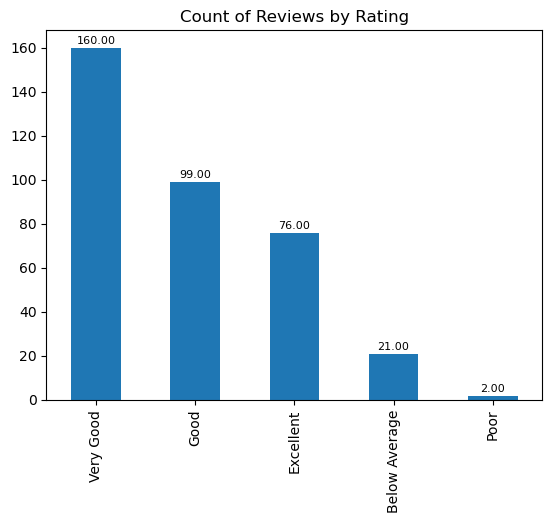

In [21]:
plots = reviews_df['rating_sent'].value_counts().plot(kind='bar', title='Count of Reviews by Rating')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')

I'm actually surprised to see the difference between the amount of 'Good' and 'Excellent' ratings - since I had seen that there were only two 'Poor' reviews I assumed that the critics writing these reviews we being pretty lenient on how they rated, but they were fairly conservative in handing out 5 stars.

For the purposes of this project, I'm going to classify shows that got 3 stars or lower as 'Negative' and 4 and 5 stars as 'Positive' to even out the spread of data; besides - why only aim for 'Good' when you could be 'Very Good' or 'Excellent'?

### Adding Show Type and Genre

But first, I'm going to add a little more information to the dataframe before we start exploring.

I want to see if there is any affect show type and genre has on a show's rating, so before we start looking at anything spaCy related I'll add these details now.

In [22]:
fix_title = {'L.A. Law':"A Soldier's Play", 'screaming':'Jagged Little Pill', 'Hair':'Soft', 
             "There's a place for us. Somewhere, a place for us.":'West Side Story', 
             'Sex and the City':'Is There Still Sex in the City?', 'haenyeos':'Endlings', 
             "An Artist's Story":'Chekhov/Tolstoy: Love Stories', 'Girl From The NorthCountry':'Girl from the North Country',
             'Oklahoma':'Oklahoma!', "Ain't Too Proud, Jersey Boys":'Harmony', 
             "for colored girls who have considered suicide/when the rainbow is enuf":"For Colored Girls Who Have Considered Suicide/When the Rainbow Is Enuf"}

reviews_df['show_title'].replace(fix_title, inplace=True)

In [23]:
other = ["My Window", "Just For Us", "The Old Man and the Pool", "for colored girls who have considered suicide/when the rainbow is enuf",
        "American Utopia", "Derren Brown: Secret", "Slava's Snowshow", "Harry Connick, Jr. - A Celebration of Cole Porter", "freestyle love supereme", "The New One", "The Illusionists: Magic of the Holidays", 
        "What the Constitution Means to Me", "Christmas Spectacular", "Death, Let Me Do My Show", "Wildfowl", "The Great Gatsby", 
        "Plays for the Plague Year", "Seven Sins", "Sorry For Your Loss", "The Very Hungry Caterpillar Show", "Misty", "A Simulacrum",
        "Cocktail Magique", "Sugar Daddy", "Without You", "Small Talk", "Where We Belong", "Sandra", "Kate", "Oh God, A Show About Abortion",
        "The Search for Signs of Intelligent Life in the Universe", "Just For Us", "Is There Still Sex in the City?", "Kristina Wong: Sweatshop Overlord",
        "Approval Junkie", "Seven Deadly Sins", "Semblance", "Speakeasy", "All the Natalie Portmans", "Cambodian Rock Band", "Incantata",
        "We're Gonna Die", "Where We Stand", "Matthew Bourne's Swan Lake", "'Twas the Night Before Christmas", "For Colored Girls Who Have Considered Suicide/When the rainbow is enuf",
        "#DateMe: An OkCupid Experiment", "Latin History for Morons"]
musicals = ["Back to the Future", "Here Lies Love", "New York, New York", "Bob Fosse's Dancin'", "Once Upon a One More Time", "Sweeney Todd", "Shucked", "Camelot",
           "A Beautiful Noise", "Some Like It Hot", "Parade", "Almost Famous", "Funny Girl", "& Juliet", "KPOP", "Into the Woods", "Mr. Saturday Night", 
           "1776", "The Little Prince", "Funny Girl", "A Strange Loop", "Oklahoma", "Mrs. Doubtfire", "Flying Over Sunset", "The Music Man",
           "Paradise Square", "The X Files", "MJ the Musical", "Diana: The Musical", "Caroline, or Change", "Girl from the North Country",
           "Riverdance", "West Side Story", "The Prom.", "Six", "Jagged Little Pill", "La Bohème", "Cats", "The Lightning Thief", "Summer: The Donna Summer Musical",
           "Oklahoma!", "Ain't Too Proud", "Hadestown", "Once on This Island", "The Story of Buddy the Elf", "Escape to Margaritaville",
           "Mean Girls", "Frozen", "Waitress", "The Phantom of the Opera", "Dear Evan Hansen", "Miss Saigon", "Bandstand", "A Bronx Tale",
           "Anastasia", "Aladdin", "Hamilton", "The Book of Mormon", "Chicago", "Rock and Roll Man", "The Harder They Come", "White Girl in Danger",
           "Cornelia Street", "Merrily We Roll Along", "Only Gold", "Stranger Things", "A Man of No Importance", "Between the Lines",
           "Kinky Boots", "Sesame Street", "As You Like It", "The Bedwetter", "Titanique", "¡Americano!", "Dreaming Zenzile", "Little Girl Blue",
           "Suffs", "Harmony", "Space Dogs", "Black No More", "Love Actually?The Unauthorized Musical Parody", "West Side Story", 
           "The Streets of New York", "The Visitor", "Winnie the Pooh", "Trevor", "Baby", "Assassins", "A Commercial Jingle for Regina Comet",
           "Bloody Bloody Andrew Jackson", "Mack & Mabel", "Bob & Carol & Ted & Alice", "Emojiland", "Darling Grenadine", "Titanic", "Sing Street",
           "Forbidden Broadway", "Scotland, PA", "Evita", "Slave Play", "Little Shop of Horrors", "Rock of Ages", "In the Green", "Bat Out of Hell",
           "Dr. Seuss' How The Grinch Stole Christmas!", "Girl From The NorthCountry", "Fiddler on the Roof", "Avenue Q", "Jersey Boys"]
plays = ["The Cottage", "Purlie Victorious: A Non-Confederate Romp Through the Cotton Patch", "The Shark Is Broken", "Good Night, Oscar",
        "The Sign in Sidney Brustein's Window", "Grey House", "Prima Facie", "Summer, 1976", "Life of Pi", "Fat Ham", "Peter Pan Goes Wrong",
        "The Thanksgiving Play", "Ohio State Murders", "Between Riverside and Crazy", "The Collaboration", "Ain't No Mo'", "A Doll's House", 
        "Pictures From Home", "Topdog/Underdog", "Kimberly Akimbo", "Walking with Ghosts", "A Christmas Carol", "Macbeth", "The Kite Runner", "POTUS",
        "Cost of Living", "Leopoldstadt", "Death of a Salesman", "The Piano Lesson", "How I Learned to Drive", "Birthday Candles", "The Minutes", "The Skin of Our Teeth",
        "Hangmen", "Clyde's", "Skeleton Crew", "Take Me Out", "Plaza Suite", "Lackawanna Blues", "The Lehman Trilogy", "Dana H.", "Chicken & Biscuits",
        "Thoughts of a Colored Man", "Trouble in Mind", "My Name is Lucy Barton", "A Soldier's Play", "Grand Horizons", "Pass Over", "The Inheritance",
        "The Rose Tattoo", "The Sound Inside", "Sea Wall", "Betrayal", "The Height of the Storm", "King Lear", "Pygmalion", "To Kill a Mockingbird",
        "Harry Potter and the Cursed Child", "Flex", "The Half-God of Rainfall", "Let's Call Her Patty", "Infinite Life", "Hamlet", "Dracula, A Comedy of Terrors",
        "Mary Gets Hers", "Toros", "Swing State", "The Comeuppance", "Days of Wine and Roses", "Bees and Honey", "The Doctor", "Wet Brain", "Primary Trust",
        "The Coast Starlight", "The Strange Undoing of Prudencia Hart", "Drinking in America", "Regretfully, So the Birds Are", "Letters From Max",
        "Elyria", "The Best We Could", "The Trees", "Dark Disabled Stories", "How to Defend Yourself", "Lucy", "Wolf Play", "black odyssey", "A Bright New Boise",
        "The Wanderers", "the bandaged place", "Camp Siegfried", "Downstate", "Catch as Catch Can", "The Crucible", "Your Own Personal Exegesis",
        "The Far Country", "American (Tele)visions", "Straight Line Crazy", "A Raisin in the Sun", "I'm Revolting", "Where the Mountain Meets the Sea",
        "My Broken Language", "You Will Get Sick", "This Beautiful Future", "Patience", "Oresteia", "Heart", "The Nosebleed", "...what the end will be", 
        "Snow in Midsummer", "Soft", "Corsicana", "53% of", "Hamlet", "Richard III", "Epiphany", "Wish You Were Here", "Exception to the Rule", "A Case for the Existence of God",
        "Which Way to the Stage", "The Vagrant Trilogy", "Fat Ham", "Golden Shield", "The Chinese Lady", "At the Wedding", "Confederates",
        "Help", "Coal Country", "To My Girls", "Cyrano de Bergerac", "English", "Intimate Apparel", "SHHHH", "Tambo & Bones", "sandblasted",
        "On Sugarland", "Out of Time", "Prayer for the French Republic", "A Christmas Carol", "Selling Kabul", "Long Day's Journey into Night",
        "School Girls; or the African Mean Girls Play", "Medicine", "Cullud Wattah", "Persuasion", "Sanctuary City", "Letters to Suresh",
        "Autumn Royal", "Mrs. Warren's Profession", "Fairycakes", "Twilight: Los Angeles, 1992", "The Woman in Black", "Morning Sun", "Endlings",
        "The Perplexed", "72 Miles to Go...", "Merry Wives", "The Last of the Love Letters", "Anatomy of a Suicide", "Blues For An Alabama Sky",
        "Dana H.", "The Hot Wing King", "The Headlands", "Chekhov/Tolstoy: Love Stories", "The Confession of Lily Dare", "Paris", "Frankenstein", 
        "Pride & Prejudice", "The Ferryman", "Halfway Bitches Go Straight to Heaven", "MsTrial", "London Assurance", "The Thin PLace", "The Tragedy of Macbeth",
        "The Michaels", "Molly Sweeney", "Fires in the Mirror", "Seared", "Cyrano", "The Half-Life of Marie Curie", "A Bright Room Called Day",
        "L.O.V.E.R.", "Sunday", "Our Dear Dead Drug Lord", "Wives", "Dublin Carol", "The Way She Spoke", "The Rolling Stone", "Mojada", "Coriolanus",
        "Make Believe", "Little Gem", "Admissions", "Popcorn Falls", "The Play That Goes Wrong", "Much Ado About Nothing", "The Piano Lesson"]

In [24]:
drama = ["Incantata", "Parade", "Flying Over Sunset", "Paradise Square", "Diana: The Musical",
         "Caroline, or Change", "The Phantom of the Opera", "Dear Evan Hansen", "Miss Saigon", "Bandstand", 
         "White Girl in Danger", "Cornelia Street", "Merrily We Roll Along", "A Man of No Importance", "The Streets of New York",
         "Trevor", "The Sign in Sidney Brustein's Window", "Prima Facie",
         "Summer, 1976", "Life of Pi", "Ohio State Murders", "The Collaboration",
         "The Kite Runner", "Cost of Living", "Leopoldstadt", "The Piano Lesson", "How I Learned to Drive",
         "Birthday Candles", "Skeleton Crew", "Take Me Out", "The Lehman Trilogy", "Dana H.", "Thoughts of a Colored Man",
         "Trouble in Mind", "My Name is Lucy Barton", "A Soldier's Play", "Grand Horizons", "Pass Over", "The Rose Tattoo",
         "The Sound Inside", "Sea Wall", "The Height of the Storm", "Pygmalion", "To Kill a Mockingbird", 
         "Harry Potter and the Cursed Child", "Flex", "The Half-God of Rainfall", "Swing State", "The Comeuppance",
         "Days of Wine and Roses", "The Doctor", "Wet Brain", "Elyria", "The Trees", "How to Defend Yourself", "Wolf Play", 
         "The Wanderers", "the bandaged place", "Camp Siegfried", "Downstate", "Catch as Catch Can", 
         "A Raisin in the Sun", "Where the Mountain Meets the Sea", "You Will Get Sick", "Heart", "Soft", 
         "Corsicana", "Epiphany", "A Case for the Existence of God", "Golden Shield", "The Chinese Lady", "Help", "To My Girls",
         "Cyrano de Bergerac", "Intimate Apparel", "SHHHH", "On Sugarland", "Out of Time", "Medicine", "Persuasion", "Sanctuary City",
         "Mrs. Warren's Profession", "The Woman in Black", "72 Miles to Go...", "Anatomy of a Suicide", "Blues For An Alabama Sky",
         "Chekhov/Tolstoy: Love Stories", "Paris", "Frankenstein", "The Ferryman", "Halfway Bitches Go Straight to Heaven", "MsTrial",
         "The Thin Place", "The Michaels", "Molly Sweeney", "Cyrano", "The Half-Life of Marie Curie", "Sunday", "Dublin Carol", 
         "The Rolling Stone", "Make Believe", "Admissions", "The Piano Lesson", "The Great Gatsby — The Immersive Show", 
         "Plays for the Plague Year", "Where We Stand"]
comedy = ["Just For Us", "The Old Man and the Pool", "freestyle love supreme", "The New One", "Death, Let Me Do My Show", "Wildfowl",
         "Sugar Daddy", "Small Talk", "Oh God, A Show About Abortion", "Just For Us", "Kristina Wong: Sweatshop Overlord", "Mr. Saturday Night",
         "A Strange Loop", "Mrs. Doubtfire", "The Prom.", "La Bohème", "Mean Girls", "Waitress",
         "The Book of Mormon", "The Bedwetter", "Bob & Carol & Ted & Alice", 
         "Sing Street", "Avenue Q", "The Cottage", "Purlie Victorious: A Non-Confederate Romp Through the Cotton Patch",
         "The Shark is Broken", "Peter Pan Goes Wrong", "Between Riverside and Crazy", "Pictures From Home", "The Minutes",
         "The Skin of Our Teeth", "Hangmen", "Clyde's", "Plaza Suite", "Chicken & Biscuits", "The Inheritance", "POTUS", "Let's Call Her Patty",
         "Infinite Life", "Dracula, A Comedy of Terrors", "Primary Trust", "The Coast Starlight",
         "Letters From Max", "A Bright New Boise", "Your Own Personal Exegesis", "I'm Revolting", "...what the end will be",
         "Wish You Were Here", "Exception to the Rule", "Which Way to the Stage", "At the Wedding", "Confederates", "English", "Tambo & Bones",
         "School Girls; or the African Mean Girls Play", "Cullud Wattah", "Fairycakes", "Morning Sun", "The Perplexed", "Merry Wives",
         "The Hot Wing King", "The Confession of Lily Dare", "London Assurance", "Seared", "A Bright Room Called Day",
         "Popcorn Falls", "The Play That Goes Wrong", "Regretfully, So the Birds Are", "What the Constitution Means to Me",
         "Some Like It Hot", "Shucked", "Latin History for Morons", "The Shark Is Broken", "Sorry For Your Loss", "Misty", 
         "Kate", "53% Of", "All the Natalie Portmans", "We're Gonna Die", "#DateMe: An OkCupid Experiment"]
romance = ["Anastasia", "As You Like It", "Mack & Mabel", "Darling Grenadine", "Bees and Honey", "Drinking in America", "This Beautiful Future",
          "The Last of the Love Letters", "Pride & Prejudice", "L.O.V.E.R.", "Much Ado About Nothing"]
tragedy = ["Fat Ham", "Hamlet", "Mary Gets Hers", "The Best We Could",
          "Patience", "Oresteia", "Snow in Midsummer", "Coal Country", "The Tragedy of Macbeth", "Mojada", "Coriolanus",
          "Little Gem", "For Colored Girls Who Have Considered Suicide/When the Rainbow Is Enuf"]
epic = ["Suffs", "black odyssey", "The Far Country", "American (Tele)visions", "The Vagrant Trilogy", "Letters to Suresh"]
thriller = ["Grey House", "Lucy", "Selling Kabul", "Our Dear Dead Drug Lord", "Sandra"]
contemporary = ["KPOP", "Kinky Boots", "The Visitor", "Baby", "A Commercial Jingle For Regina Comet", "Emojiland",
               "In the Green", "Toros", "The Headlands", "Slava's Snowshow", "Matthew Bourne'sSwan Lake"]
classic = ["Sweeney Todd", "Funny Girl", "1776", "Oklahoma!", "The Music Man", "West Side Story", "Cats", "Chicago", "Fiddler on the Roof",
          "A Doll's House", "A Christmas Carol", "Macbeth", "Death of a Salesman", "Betrayal", "King Lear", "The Crucible", "Camelot", 
          "'Twas the Night Before Christmas"]
fam_friendly = ["The Little Prince", "The Story of Buddy the Elf", "Frozen", "Aladdin", "Sesame Street", "Space Dogs", "Winnie the Pooh",
               "Dr. Seuss' How The Grinch Stole Christmas!", "The Very Hungry Caterpillar Show"]
dark_comedy = ["Into the Woods", "Little Shop of Horrors", "Good Night, Oscar", "Topdog/Underdog", "Kimberly Akimbo", "sandblasted",
              "Autumn Royal"]
biography = ["¡Americano!", "Dreaming Zenzile", "Little Girl Blue", "Walking with Ghosts", "Dark Disabled Stories", "Straight Line Crazy",
            "My Broken Language", "The Nosebleed", "Long Day's Journey into Night", "The Way She Spoke", "My Window", "Without You", 
            "Harmony", "Is There Still Sex in the City?", "Approval Junkie"]
satire = ["Black No More", "Slave Play", "The Thanksgiving Play", "Ain't No Mo'", "53% of", "Wives"]
parody = ["The X Files", "Stranger Things", "Love Actually?The Unauthorized Musical Parody", "Scotland, PA"]
other_genre = ["Here Lies Love", "Six", "Hadestown", "Once on This Island", "A Bronx Tale", "A Bronx Tale - The Musical",
               "Hamilton", "The Harder They Come", "Only Gold", "Bloody Bloody Andrew Jackson", "Bat Out of Hell", "Twilight: Los Angeles, 1992",
               "Fires in the Mirror", "Lackawanna Blues", "Endlings", "The Search for Signs of Intelligent Life in the Universe",
               "Derren Brown: Secret", "American Utopia", "The Illusionists: Magic of the Holidays", "Harry Connick, Jr. - A Celebration of Cole Porter",
               "Christmas Spectacular", "Seven Sins", "A Simulacrum", "CocktaiL Magique", "Where We Belong", "Seven Deadly Sins", 
               "Semblance", "Speakeasy", "Cambodian Rock Band"]
jukebox = ["New York, New York", "Once Upon a One More Time", "A Beautiful Noise", "Almost Famous", "& Juliet", "MJ the Musical",
          "Girl from the North Country", "Jagged Little Pill", "Summer: The Donna Summer Musical", "Ain't Too Proud", "Escape to Margaritaville",
          "Titanique", "Jersey Boys", "Rock of Ages"]
revue = ["Bob Fosse's Dancin'", "Riverdance", "Assassins", "Forbidden Broadway"]
historical = ["Rock and Roll Man", "Titanic", "Evita", "Richard III", "Prayer for the French Republic"]
fantasy = ["Back to the Future", "The Lightning Thief", "Between the Lines", "The Strange Undoing of Prudencia Hart"]

In [25]:
genres = {
    'drama' : drama,
    'comedy' : comedy,
    'romance' : romance,
    'tragedy' : tragedy,
    'epic' : epic,
    'thriller' : thriller,
    'contemporary' : contemporary,
    'classic' : classic,
    'fam_friendly' : fam_friendly,
    'dark_comedy' : dark_comedy,
    'biography' : biography,
    'satire' : satire,
    'parody' : parody,
    'other_genre' : other_genre,
    'jukebox' : jukebox,
    'revue' : revue,
    'historical' : historical,
    'fantasy' : fantasy
}

In [26]:
def check_type(show):
    if show in musicals:
        return 'musical'
    elif show in plays:
        return 'play'
    else:
        return 'other'
    
reviews_df['type'] = reviews_df['show_title'].apply(check_type)

In [27]:
def assign_genre(show):
    assigned_genres = [genre for genre, shows in genres.items() if show in shows]
    return ', '.join(assigned_genres) if assigned_genres else 'n/a'

reviews_df['genre'] = reviews_df['show_title'].apply(assign_genre)

## Preprocessing with spaCy

I will be examining the sentiment and subjectivity of the reviews I've gathered, and then based on whether spaCy correctly assigns the sentiment label I'll begin to look for any trends that come through.

In [28]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [29]:
reviews_df['fixed_sent'] = ''

for index, row in reviews_df.iterrows():
    if row['rating'] <= 3:
        reviews_df.loc[index, 'fixed_sent'] = 'Negative'
    else:
        reviews_df.loc[index, 'fixed_sent'] = 'Positive'

In [30]:
reviews_df['fixed_sent'].value_counts()

Positive    236
Negative    122
Name: fixed_sent, dtype: int64

In [31]:
label = []
score = []
subjectivity = []
article_pos = []
article_neg = []

for index, review in reviews_df.iterrows():
    text = review['body']
    doc = nlp(text)
    sentiment = round(doc._.blob.polarity, 2)
    subj = round(doc._.blob.subjectivity, 2)
    
    if sentiment > 0:
        sent_label = 'Positive'
    else:
        sent_label = 'Negative'
        
    label.append(sent_label)
    score.append(sentiment)
    subjectivity.append(subj)
    
    for x in doc._.blob.sentiment_assessments.assessments:
        if x[1] > 0:
            article_pos.append(x[0][0])
        elif x[1] < 0:
            article_neg.append(x[0][0])
        else:
            pass
        
reviews_df['article_score'] = score
reviews_df['article_sent'] = label
reviews_df['article_subj'] = subjectivity
reviews_df

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
0,'Melissa Etheridge: My Window' review — a cele...,"Read our review of ', 'My Window', "", Grammy A...",3,Good,My Window,other,biography,Negative,0.19,Positive,0.48
1,'Alex Edelman: Just For Us' review — solo show...,"Read our five-star review of ', 'Just For Us',...",5,Excellent,Just For Us,other,comedy,Positive,0.11,Positive,0.40
2,'Back to the Future' review — 1.21 gigawatts o...,"Read our four-star review of ', 'Back to the F...",4,Very Good,Back to the Future,musical,fantasy,Positive,0.08,Positive,0.38
3,'The Cottage' review — an over-the-top comedy ...,"Read our four-star review of ', 'The Cottage',...",4,Very Good,The Cottage,play,comedy,Positive,0.13,Positive,0.53
4,'Purlie Victorious' review — hilarious satire ...,"Read our five-star review of ', 'Purlie Victor...",5,Excellent,Purlie Victorious: A Non-Confederate Romp Thro...,play,comedy,Positive,0.09,Positive,0.40
...,...,...,...,...,...,...,...,...,...,...,...
353,Review of Fiddler on the Roof (in Yiddish) at ...,"Full disclosure - I saw Zero Mostel in', 'Fidd...",4,Very Good,Fiddler on the Roof,musical,classic,Positive,0.16,Positive,0.43
354,Review of the Public Theater's Shakespeare in ...,"This production of ', 'Much Ado About Nothing'...",5,Excellent,Much Ado About Nothing,play,romance,Positive,0.23,Positive,0.52
355,Latin History for Morons,NOTE: This is a review of the Off-Broadway pre...,4,Very Good,Latin History for Morons,other,comedy,Positive,0.07,Positive,0.48
356,The Piano Lesson,This is a production of substance and grace. I...,5,Excellent,The Piano Lesson,play,drama,Positive,0.20,Positive,0.52


In [32]:
unmatched = []
for index, row in reviews_df.iterrows():
    if row['fixed_sent'] != row['article_sent']:
        unmatched.append(index)
unmatched_df = reviews_df.loc[unmatched]
unmatched_df

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
0,'Melissa Etheridge: My Window' review — a cele...,"Read our review of ', 'My Window', "", Grammy A...",3,Good,My Window,other,biography,Negative,0.19,Positive,0.48
7,"'Good Night, Oscar' review — Sean Hayes delive...","Read our review of ', 'Good Night, Oscar', ', ...",3,Good,"Good Night, Oscar",play,dark_comedy,Negative,0.14,Positive,0.45
10,"'New York, New York' review — Kander and Ebb m...","Read our review of ', 'New York, New York', ' ...",3,Good,"New York, New York",musical,jukebox,Negative,0.16,Positive,0.44
12,"'Summer, 1976' review — Laura Linney and Jessi...","Read our review of ', 'Summer, 1976', ' on Bro...",3,Good,"Summer, 1976",play,drama,Negative,0.14,Positive,0.44
21,'Camelot' review — this shining kingdom's revi...,"Read our review of the latest ', 'Camelot', ' ...",3,Good,Camelot,musical,classic,Negative,0.18,Positive,0.48
...,...,...,...,...,...,...,...,...,...,...,...
326,"Review of The New Group's Cyrano, starring Pet...","I wanted to like this production of ', 'Cyrano...",3,Good,Cyrano,play,drama,Negative,0.09,Positive,0.48
333,Review of WP Theater/Second Stage Theater's Ou...,Quiet. Small. Submissive. What happens when th...,5,Excellent,Our Dear Dead Drug Lord,play,thriller,Positive,-0.00,Negative,0.52
335,"Review of Little Shop of Horrors, starring Jon...","The plant at the centre of ', 'Little Shop of ...",3,Good,Little Shop of Horrors,musical,dark_comedy,Negative,0.14,Positive,0.48
338,"Review of Audible's the way she spoke, starrin...",It is is snowing inJuárez?It never snows inJuá...,5,Excellent,The Way She Spoke,play,biography,Positive,-0.07,Negative,0.46


In [33]:
unmatched_df['fixed_sent'].value_counts()

Negative    113
Positive      4
Name: fixed_sent, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
y_true = reviews_df['fixed_sent']
y_pred = reviews_df['article_sent']

spacy_accuracy = accuracy_score(y_true, y_pred)
print(spacy_accuracy)

0.6731843575418994


While the accuracy isn't great, that isn't the focus of this project, so I'll be dropping the rows that don't have matching sentiments to accurately visualize the trends I'm looking for.

I'll keep the unmatched rows and visualize those later to see if there are any trends to look at there, and I'm changing the sentiment labels to be 1 or 0 for future plotting purposes.

In [35]:
matched_df = reviews_df[~reviews_df['show_title'].isin(unmatched_df['show_title'])].copy()
matched_df['fixed_sent'] = matched_df['fixed_sent'].replace({'Positive':1, 'Negative':0})
unmatched_df['fixed_sent'] = unmatched_df['fixed_sent'].replace({'Positive':1, 'Negative':0})
unmatched_df['article_sent'] = unmatched_df['article_sent'].replace({'Positive':1, 'Negative':0})

In the code above I'm only changing the fixed_sent column in the matching dataframe since it feels redundant to do both that and the article_sent column, meanwhile I want to preserve the differences in the unmatched dataframe and still have them converted in case I need to visualize anything later.

Looking at the range of scores:

In [36]:
matched_df['article_score'].describe()

count    235.000000
mean       0.127872
std        0.067195
min       -0.030000
25%        0.085000
50%        0.120000
75%        0.170000
max        0.320000
Name: article_score, dtype: float64

In [37]:
unmatched_df['article_score'].describe()

count    117.000000
mean       0.117778
std        0.058958
min       -0.070000
25%        0.080000
50%        0.130000
75%        0.160000
max        0.240000
Name: article_score, dtype: float64

Let's take a look at the shows that have the lowest score:

In [38]:
matched_df[matched_df['article_score'] == -0.03]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
250,'Black No More' Off-Broadway review — a talent...,"The nicest thing I can say about ', 'Black No ...",1,Poor,Black No More,musical,satire,0,-0.03,Negative,0.44
255,'Selling Kabul' review — unrelenting tension m...,What happened to the citizens of Afghanistan a...,3,Good,Selling Kabul,play,thriller,0,-0.03,Negative,0.52


In [39]:
unmatched_df[unmatched_df['article_score'] == -0.07]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
338,"Review of Audible's the way she spoke, starrin...",It is is snowing inJuárez?It never snows inJuá...,5,Excellent,The Way She Spoke,play,biography,1,-0.07,0,0.46


The ratings that have the lowest article score in the matched dataframe make sense, but the show in the unmatched dataframe is...interesting, to say the least. Already seeing the word 'never' in the body, and the possible implications of the show title may have affected the rating on this.

In [40]:
matched_df[matched_df['article_score'] == 0.32]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
348,Review of Dr. Seuss' How The Grinch Stole Chri...,"Gavin Lee', ', as that wonderfully despicable ...",5,Excellent,Dr. Seuss' How The Grinch Stole Christmas!,musical,fam_friendly,1,0.32,Positive,0.53


In [41]:
unmatched_df[unmatched_df['article_score'] == 0.24]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
251,'A Sherlock Carol' review — an inventive take ...,"As quickly as the holidays come around, so doe...",3,Good,A Christmas Carol,play,classic,0,0.24,1,0.67


I find it interesting that so far this article in the unmatched dataframe has the highest subjectivity so far. Now that my interest is piqued, I'm going to take a look at that as well.

In [42]:
matched_df['article_subj'].describe()

count    235.000000
mean       0.482298
std        0.061344
min        0.330000
25%        0.440000
50%        0.480000
75%        0.530000
max        0.690000
Name: article_subj, dtype: float64

In [43]:
unmatched_df['article_subj'].describe()

count    117.000000
mean       0.475043
std        0.048701
min        0.360000
25%        0.450000
50%        0.470000
75%        0.510000
max        0.670000
Name: article_subj, dtype: float64

In [44]:
matched_df[matched_df['article_subj'] == 0.33]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
157,'White Girl in Danger' review — this soap oper...,"Read our four-star review of ', 'White Girl in...",4,Very Good,White Girl in Danger,musical,drama,1,0.14,Positive,0.33


In [45]:
unmatched_df[unmatched_df['article_subj'] == 0.36]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
67,‘Paradise Square’ review: An ambitious yet ove...,"Paradise Square', "", the new Broadway musical,...",2,Below Average,Paradise Square,musical,drama,0,0.08,1,0.36


In [46]:
matched_df[matched_df['article_subj'] == 0.69]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
107,Review of The Illusionists: Magic Of The Holid...,PLEASE NOTE: This is a review of the 2018 Broa...,4,Very Good,The Illusionists: Magic of the Holidays,other,other_genre,1,0.27,Positive,0.69


In [47]:
unmatched_df[unmatched_df['article_subj'] == 0.67]

,article_title,body,rating,rating_sent,show_title,type,genre,fixed_sent,article_score,article_sent,article_subj
251,'A Sherlock Carol' review — an inventive take ...,"As quickly as the holidays come around, so doe...",3,Good,A Christmas Carol,play,classic,0,0.24,1,0.67


So far I haven't been seeing any strong indication one way or the other about whether type or genre affects a show, so let's visualize everything and see if we can find a trend.

### Visualizing the Matched Data

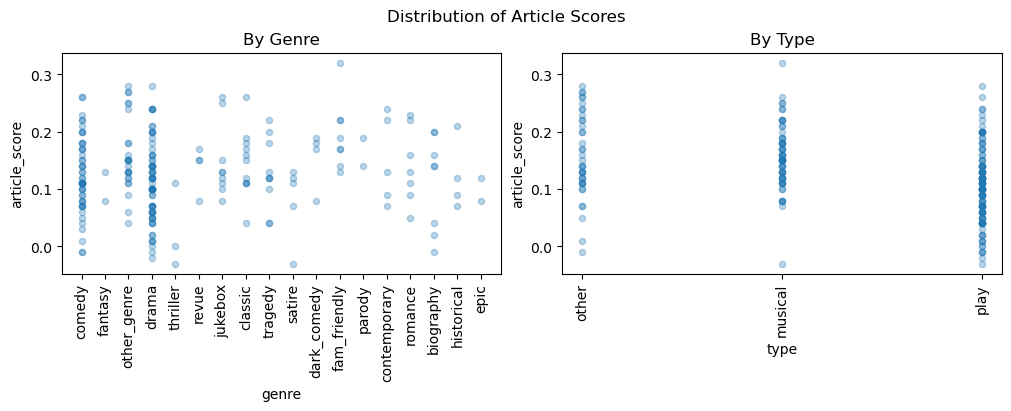

In [48]:
fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Distribution of Article Scores')

matched_df.plot(x='genre', y='article_score', kind='scatter', alpha=0.3, title='By Genre', ax=axs[0])
matched_df.plot(x='type', y='article_score', kind='scatter', alpha=0.3, title='By Type', ax=axs[1])

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

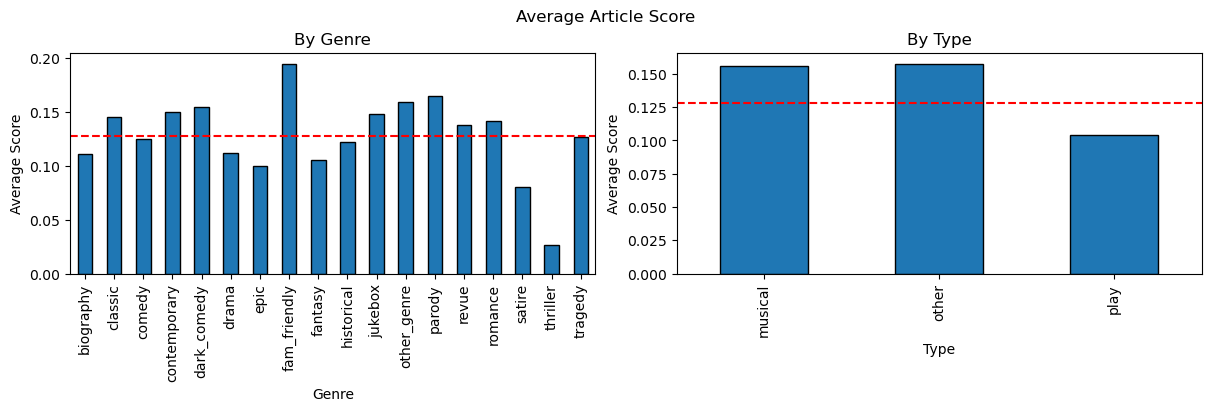

In [49]:
avg_genre_rating = matched_df.groupby('genre')['article_score'].mean(numeric_only=True)
genre_mean = matched_df['article_score'].mean()
avg_type_rating = matched_df.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = matched_df['article_score'].mean()

fig, axs = plt.subplots(1,2, figsize=(12,4), layout='constrained')
fig.suptitle('Average Article Score')
avg_genre_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Type')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Average Score')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

I'm surprised to see that plays on average have a lower score than musicals and shows in the 'other' genre, indicating less favorable/positive reviews for that particular type of show. As for the genres, I'm surprised to see that drama scored under the overall mean since there are so many popular shows that fall under that category. 

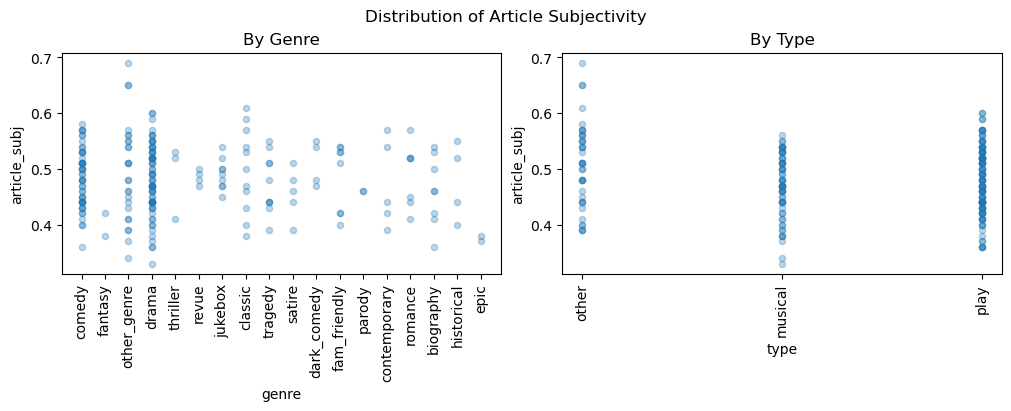

In [50]:
fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Distribution of Article Subjectivity')

matched_df.plot(x='genre', y='article_subj', kind='scatter', alpha=0.3, title='By Genre', ax=axs[0])
matched_df.plot(x='type', y='article_subj', kind='scatter', alpha=0.3, title='By Type', ax=axs[1])

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

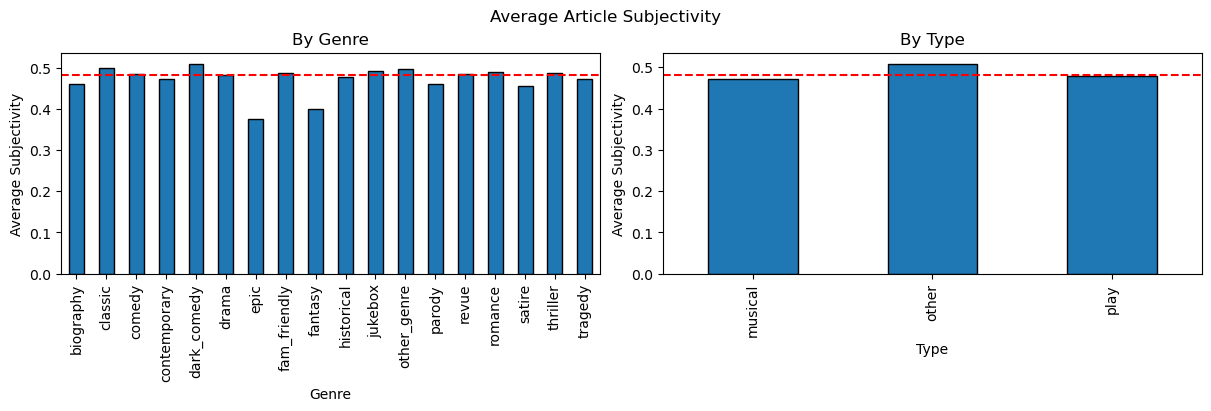

In [51]:
avg_genre_rating = matched_df.groupby('genre')['article_subj'].mean(numeric_only=True)
genre_mean = matched_df['article_subj'].mean()
avg_type_rating = matched_df.groupby('type')['article_subj'].mean(numeric_only=True)
type_mean = matched_df['article_subj'].mean()

fig, axs = plt.subplots(1,2, figsize=(12,4), layout='constrained')
fig.suptitle('Average Article Subjectivity')
avg_genre_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Subjectivity')

avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Type')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Average Subjectivity')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

It makes sense to me that shows in the 'other' show type have a higher subjectivity since the shows in that category (solo/stand-up acts especially) lend themselves for people to feel very opinionated on the contents of said show. I'm surprised to see that the epic and fantasy genres scored significantly lower than the overall mean - there isn't an obvious reason why they would score like this.

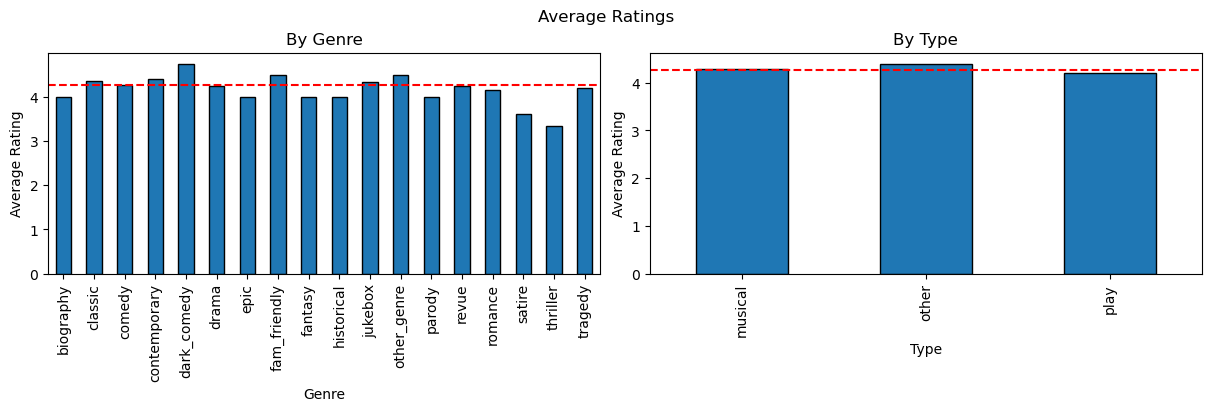

<Figure size 1000x400 with 0 Axes>

In [52]:
avg_genre_rating = matched_df.groupby('genre')['rating'].mean(numeric_only=True)
genre_mean = matched_df['rating'].mean()
avg_type_rating = matched_df.groupby('type')['rating'].mean(numeric_only=True)
type_mean = matched_df['rating'].mean()

fig, axs = plt.subplots(1,2, figsize=(12,4), layout='constrained')
fig.suptitle('Average Ratings')
avg_genre_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Rating')

plt.figure(figsize=(10,4))
avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Type')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Average Rating')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

There's no surprises for me here as the results reflect the data we've seen thus far.

### Visualizing the Unmatched Data

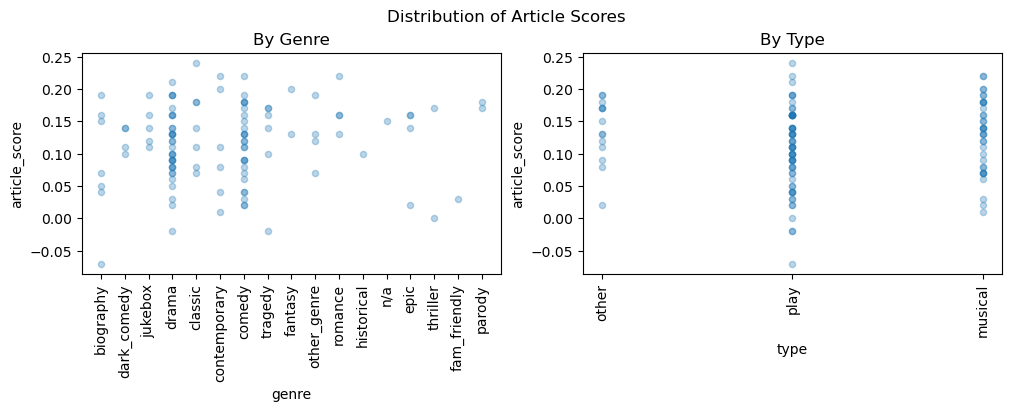

In [53]:
fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Distribution of Article Scores')

unmatched_df.plot(x='genre', y='article_score', kind='scatter', alpha=0.3, title='By Genre', ax=axs[0])
unmatched_df.plot(x='type', y='article_score', kind='scatter', alpha=0.3, title='By Type', ax=axs[1])

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

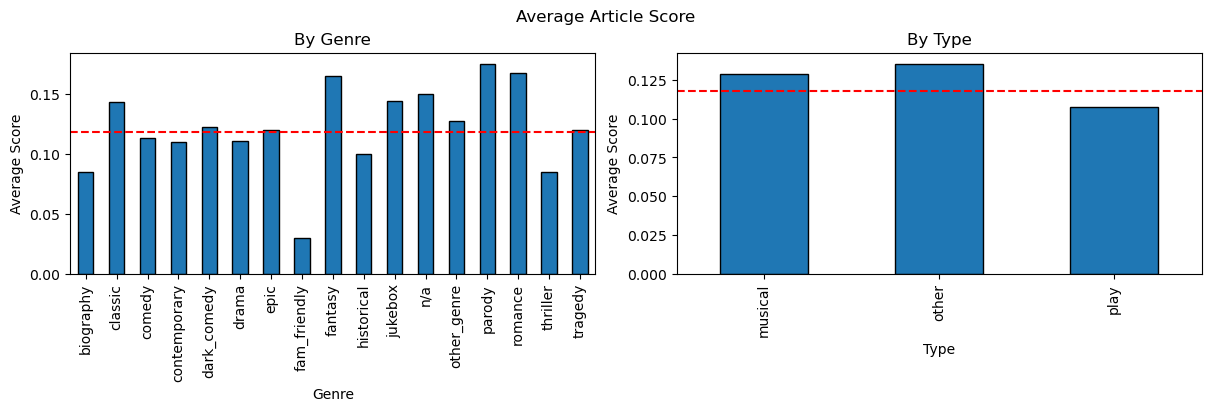

In [54]:
avg_genre_rating = unmatched_df.groupby('genre')['article_score'].mean(numeric_only=True)
genre_mean = unmatched_df['article_score'].mean()
avg_type_rating = unmatched_df.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = unmatched_df['article_score'].mean()

fig, axs = plt.subplots(1,2, figsize=(12,4), layout='constrained')
fig.suptitle('Average Article Score')
avg_genre_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Type')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Average Score')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

There's a lot less data in this dataframe I'm not too surprised to see family friendly score so low (since there might only be one or two of those types of shows in this dataframe), but I am fascinated to see that satire and revue aren't on this particular plot - it looks like those genres of shows get reviews with sentiments that correctly reflect the rating the critic gave them.

The consistency of the show types is interesting in a different way - even when spaCy wasn't able to correctly tag the reviews we still see the same trend.

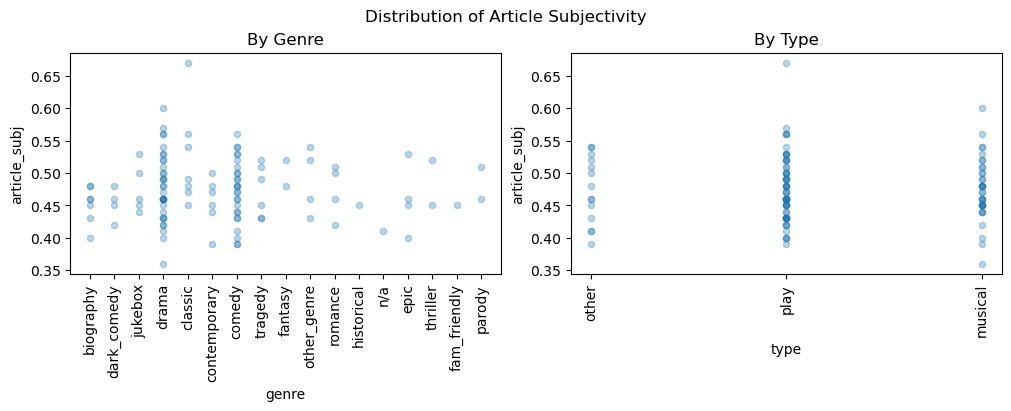

In [55]:
fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Distribution of Article Subjectivity')

unmatched_df.plot(x='genre', y='article_subj', kind='scatter', alpha=0.3, title='By Genre', ax=axs[0])
unmatched_df.plot(x='type', y='article_subj', kind='scatter', alpha=0.3, title='By Type', ax=axs[1])

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

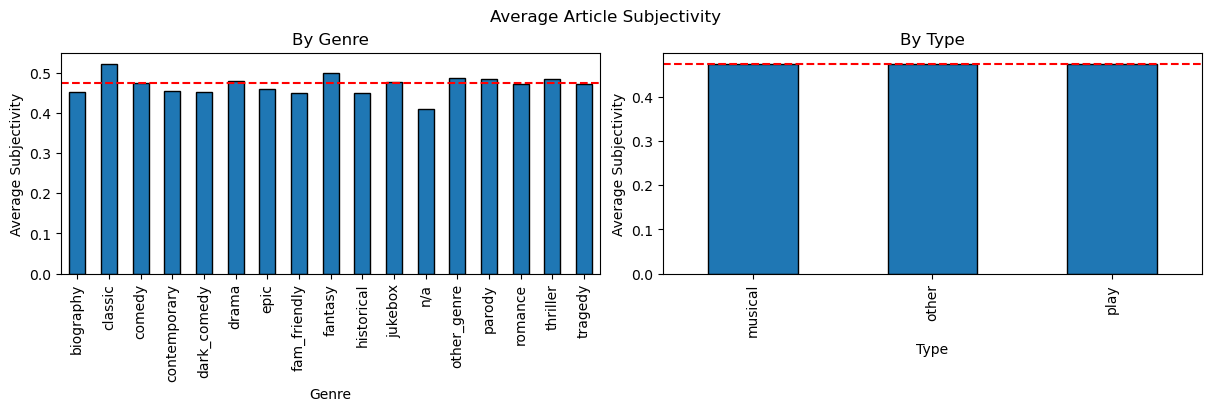

In [56]:
avg_genre_rating = unmatched_df.groupby('genre')['article_subj'].mean(numeric_only=True)
genre_mean = unmatched_df['article_subj'].mean()
avg_type_rating = unmatched_df.groupby('type')['article_subj'].mean(numeric_only=True)
type_mean = unmatched_df['article_subj'].mean()

fig, axs = plt.subplots(1,2, figsize=(12,4), layout='constrained')
fig.suptitle('Average Article Subjectivity')
avg_genre_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Subjectivity')

avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Type')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Average Subjectivity')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

This data isn't too interesting because of the low variance, so I don't have anything to say here.

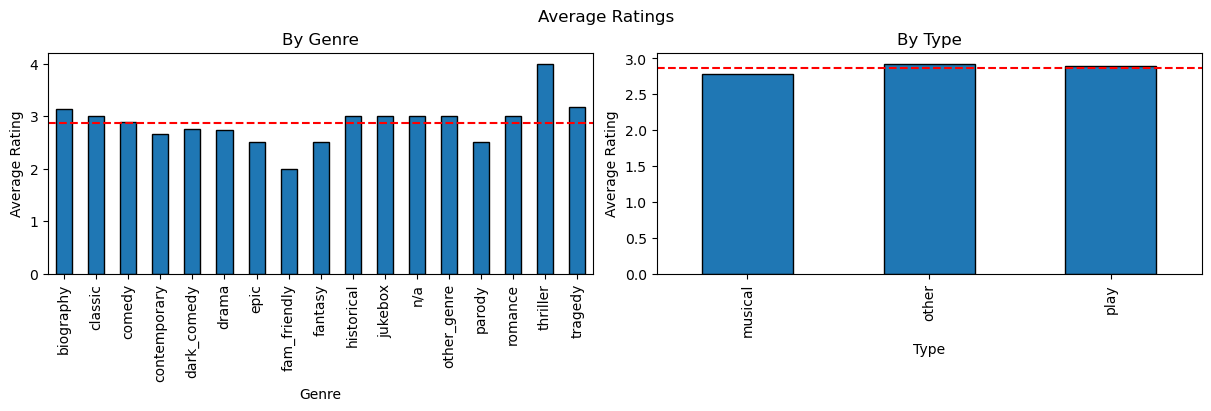

<Figure size 1000x400 with 0 Axes>

In [57]:
avg_genre_rating = unmatched_df.groupby('genre')['rating'].mean(numeric_only=True)
genre_mean = unmatched_df['rating'].mean()
avg_type_rating = unmatched_df.groupby('type')['rating'].mean(numeric_only=True)
type_mean = unmatched_df['rating'].mean()

fig, axs = plt.subplots(1,2, figsize=(12,4), layout='constrained')
fig.suptitle('Average Ratings')
avg_genre_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Rating')

plt.figure(figsize=(10,4))
avg_type_rating.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Type')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Average Rating')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

The genre breakdown for the average ratings is really intersting to me, we have quite a bit of variance compared to what we saw when we looked at the ratings in the matched dataframe. Thriller having the highest average rating while every other genre is right around the overall  mean or below might indicate some bias in spaCy's sentiment analysis - because words used for thriller shows might be more 'negative' because of the show's contents, doesn't mean that the review overall is negative.

### Visualizing the Matched Financial Data

In [58]:
merged = pd.merge(matched_df, playbill_df, on='show_title', how='left')
numeric = merged.select_dtypes(include='number').columns.tolist()
final = merged.groupby(['show_title', 'type', 'genre'])[numeric].mean().reset_index()
final.dropna(inplace=True)
final

,show_title,type,genre,rating,fixed_sent,article_score,article_subj,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
1,& Juliet,musical,jukebox,4.0,1.0,0.13,0.48,2022.812500,1.105814e+06,141.335833,329.083333,7817.062500,1026.666667,7.437500,96.977292
3,1776,musical,classic,4.0,1.0,0.15,0.40,2004.377049,2.880817e+05,48.558689,121.000000,6629.606557,1158.213115,6.918033,78.749836
7,A Doll's House,play,classic,5.0,1.0,0.11,0.59,2008.050000,5.188624e+05,76.038000,161.575000,6613.225000,987.400000,6.425000,91.692000
9,A Raisin in the Sun,play,drama,4.0,1.0,0.06,0.44,2009.000000,8.064863e+05,103.308000,217.625000,7782.633333,1062.000000,5.766667,94.961667
11,A Soldier's Play,play,drama,4.0,1.0,0.05,0.47,2019.909091,3.733024e+05,74.132727,297.000000,5015.818182,721.000000,5.000000,95.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Titanic,musical,historical,4.0,1.0,0.21,0.55,1997.750000,5.430196e+05,52.783173,75.240385,10135.288462,1475.000000,7.653846,86.962404
206,Topdog/Underdog,play,dark_comedy,5.0,1.0,0.08,0.48,2010.500000,2.626568e+05,55.225000,150.092105,4914.447368,979.736842,6.447368,62.948158
207,Trouble in Mind,play,drama,5.0,1.0,0.02,0.36,2021.181818,1.557975e+05,45.259091,45.259091,3367.363636,727.000000,5.272727,65.993636
208,"Twilight: Los Angeles, 1992",play,other_genre,4.0,1.0,0.04,0.43,1994.000000,1.006112e+05,26.502727,26.502727,3797.272727,1104.000000,6.545455,50.950000


I want to see if there are any variables in this dataframe that have decent correlation to each other, so I make a heatmap and am pleasantly surprised to see that there are quite a few pairs that have a correlation higher than 0.3. 

<Axes: >

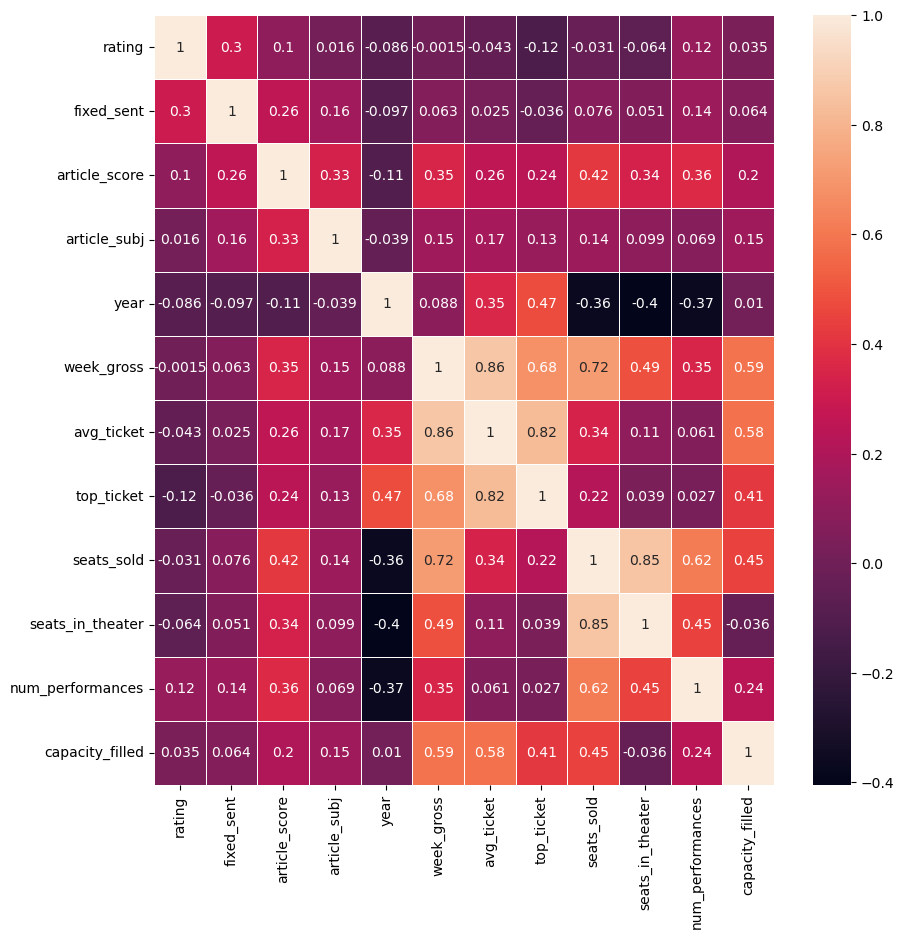

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(final.corr(), annot=True, linewidth=0.5)

I'll keep these values in mind (particularly article score in relation to the financial information we just got from the Playbill dataframe) but I'm still going to branch out and explore everything before honing into the plots that are useful for my particular problem statement.

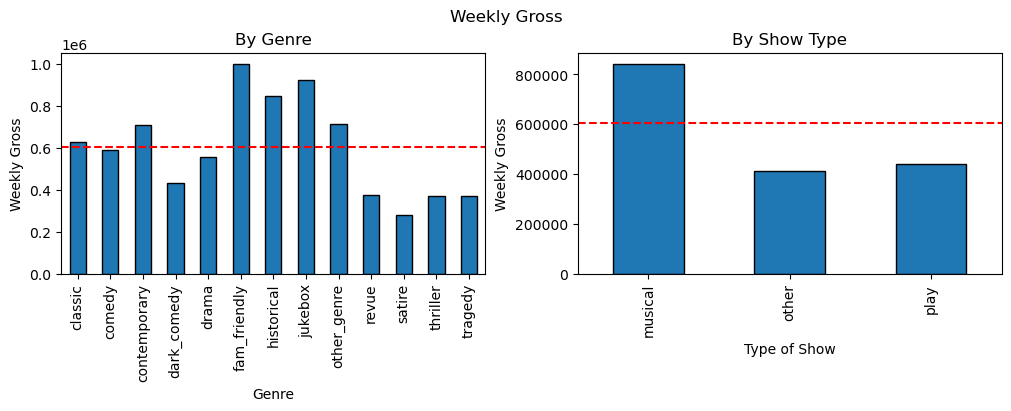

In [60]:
avg_genre_gross = final.groupby('genre')['week_gross'].mean(numeric_only=True)
genre_mean = final['week_gross'].mean()
avg_type_gross = final.groupby('type')['week_gross'].mean(numeric_only=True)
type_mean = final['week_gross'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Weekly Gross')
avg_genre_gross.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Weekly Gross')

avg_type_gross.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Weekly Gross')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Family friendly musicals takes the crown here, which is understandable when you realize the amount of tickets that get sold to these shows are at least double to quadruple the amount of tickets that would get sold to any other show, because the entire family is likely to go see a family friendly musical than, say, a dark comedy show.

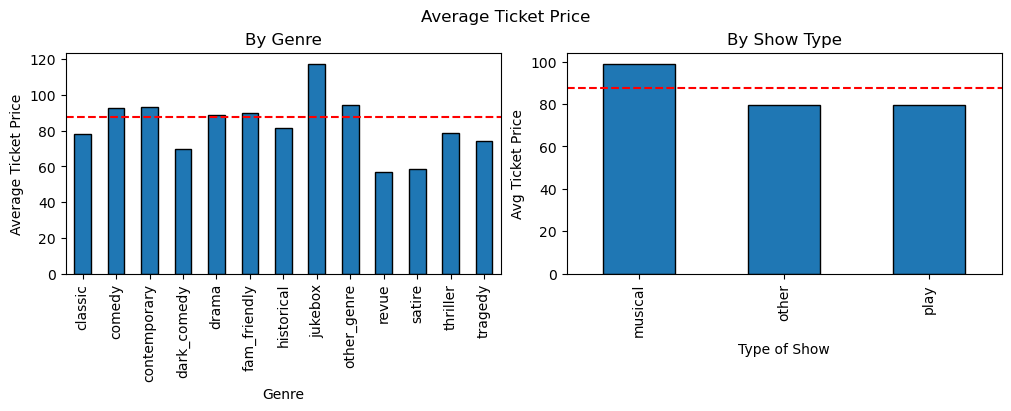

In [61]:
avg_gtick_price = final.groupby('genre')['avg_ticket'].mean(numeric_only=True)
genre_mean = final['avg_ticket'].mean()
avg_ttick_price = final.groupby('type')['avg_ticket'].mean(numeric_only=True)
type_mean = final['avg_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Average Ticket Price')
avg_gtick_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Ticket Price')

avg_ttick_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Avg Ticket Price')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

I'm surprised to see that the jukebox genre has the highest average ticket price by quite a margin and that the historical genre has a lower average price than the overall mean, especially since historical came in third in top grossing genres.

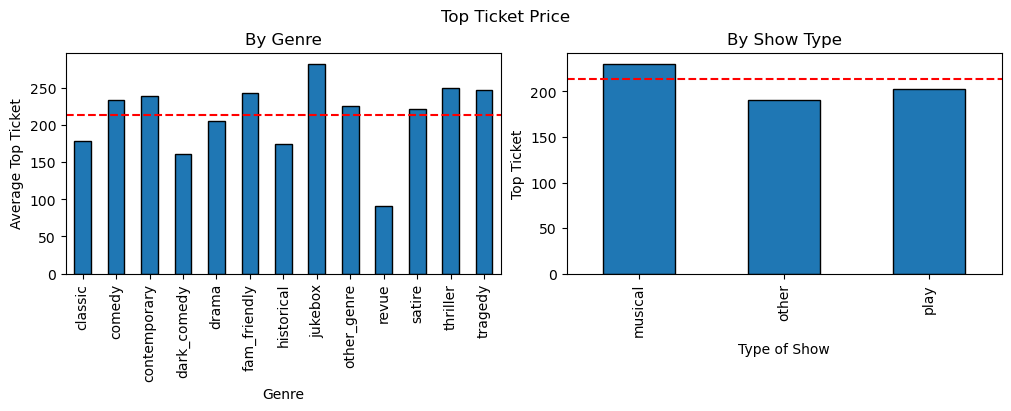

In [62]:
top_gticket_price = final.groupby('genre')['top_ticket'].mean(numeric_only=True)
genre_mean = final['top_ticket'].mean()
top_ttick_price = final.groupby('type')['top_ticket'].mean(numeric_only=True)
type_mean = final['top_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Top Ticket Price')
top_gticket_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Top Ticket')

top_ttick_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Top Ticket')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

It's surprising to see some of these genres be right around or above the overall mean of top ticket prices when we saw in the weekly gross plot that some of these same genres didn't come close to the overall gross mean.

### Visualizing the Unmatched Financial Data

In [63]:
merged2 = pd.merge(unmatched_df, playbill_df, on='show_title', how='left')
numeric2 = merged2.select_dtypes(include='number').columns.tolist()
final2 = merged2.groupby(['show_title', 'type', 'genre'])[numeric2].mean().reset_index()
final2.dropna(inplace=True)
final2

,show_title,type,genre,rating,fixed_sent,article_score,article_sent,article_subj,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
5,A Christmas Carol,play,classic,3.0,0.0,0.24,1.0,0.67,2011.269231,5.135819e+05,74.351154,193.573462,7313.269231,1127.692308,6.461538,83.475769
8,Almost Famous,musical,jukebox,3.0,0.0,0.14,1.0,0.53,2022.142857,7.279866e+05,116.377143,282.714286,6249.500000,1024.714286,5.500000,80.323571
10,Anastasia,musical,romance,3.0,0.0,0.16,1.0,0.50,2017.735849,8.815083e+05,105.252736,309.575472,8318.235849,1143.000000,7.622642,91.666887
15,Bandstand,musical,drama,3.0,0.0,0.13,1.0,0.46,2017.000000,5.394915e+05,83.117200,211.880000,6493.400000,1033.000000,6.640000,83.177600
17,Birthday Candles,play,drama,3.0,0.0,0.19,1.0,0.56,2022.000000,2.780625e+05,66.360000,196.272727,4260.909091,727.000000,5.181818,79.831818
18,Bloody Bloody Andrew Jackson,musical,other_genre,3.0,0.0,0.07,1.0,0.52,2010.066667,3.753039e+05,61.416000,190.000000,6109.066667,1033.200000,6.266667,73.930667
20,Camelot,musical,classic,3.0,0.0,0.18,1.0,0.48,2014.428571,6.754433e+05,91.358214,191.937143,7725.250000,1300.142857,6.142857,81.185714
34,Escape to Margaritaville,musical,jukebox,3.0,0.0,0.12,1.0,0.46,2018.000000,6.222300e+05,83.136500,247.000000,7677.200000,1626.000000,6.200000,63.050500
37,Flying Over Sunset,musical,drama,3.0,0.0,0.19,1.0,0.54,2021.300000,2.274955e+05,57.137000,57.137000,4006.700000,1066.000000,3.500000,52.661000
40,Funny Girl,musical,classic,3.0,0.0,0.18,1.0,0.49,2022.473684,1.437020e+06,164.931053,164.931053,8579.855263,1219.000000,7.486842,89.477105


Looking at the plots below, I don't know that there are any meaningful conclusions to draw from what I've visualized, but I'll keep them here in this notebook for consistency's sake.

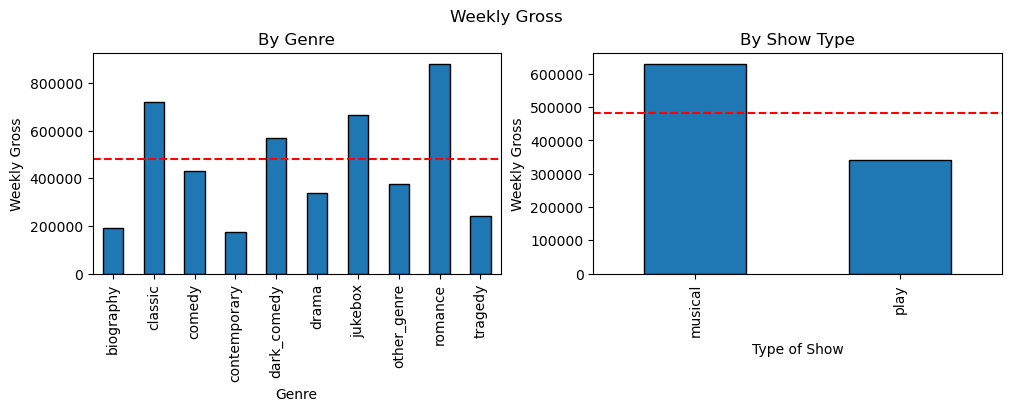

In [64]:
avg_genre_gross = final2.groupby('genre')['week_gross'].mean(numeric_only=True)
genre_mean = final2['week_gross'].mean()
avg_type_gross= final2.groupby('type')['week_gross'].mean(numeric_only=True)
type_mean = final2['week_gross'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Weekly Gross')
avg_genre_gross.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Weekly Gross')

avg_type_gross.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Weekly Gross')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

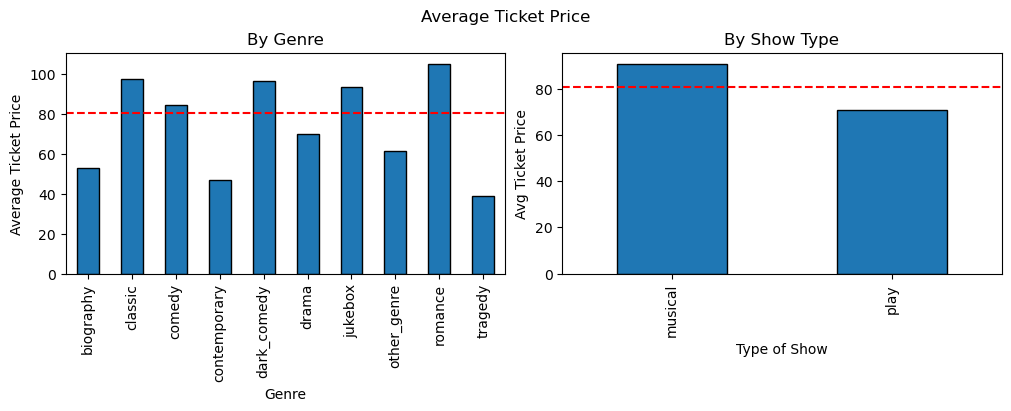

In [65]:
avg_gtick_price = final2.groupby('genre')['avg_ticket'].mean(numeric_only=True)
genre_mean = final2['avg_ticket'].mean()
avg_ttick_price = final2.groupby('type')['avg_ticket'].mean(numeric_only=True)
type_mean = final2['avg_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Average Ticket Price')
avg_gtick_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Ticket Price')

avg_ttick_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Avg Ticket Price')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

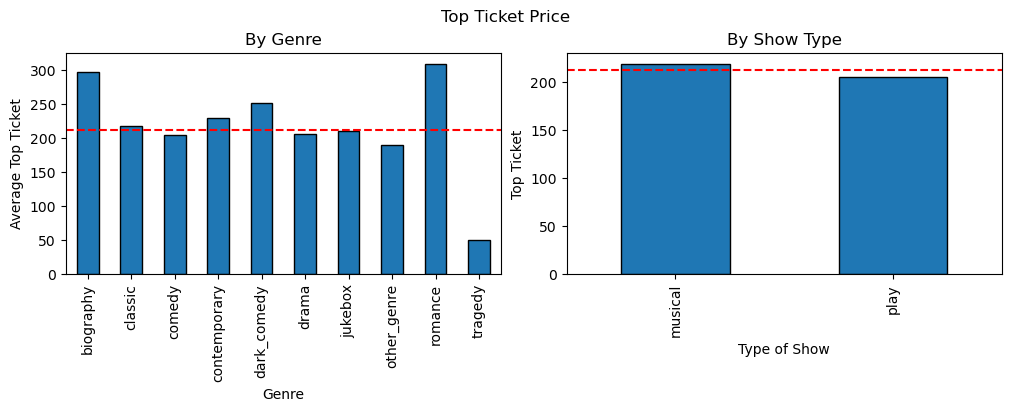

In [66]:
top_gticket_price = final2.groupby('genre')['top_ticket'].mean(numeric_only=True)
genre_mean = final2['top_ticket'].mean()
top_ttick_price = final2.groupby('type')['top_ticket'].mean(numeric_only=True)
type_mean = final2['top_ticket'].mean()

fig, axs = plt.subplots(1,2, figsize=(10,4), layout='constrained')
fig.suptitle('Top Ticket Price')
top_gticket_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

axs[0].set_title('By Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Top Ticket')

top_ttick_price.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[1].set_title('By Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Top Ticket')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [67]:
final.to_csv('final.csv', index=False)
final2.to_csv('final2.csv', index=False)
matched_df.to_csv('matched.csv', index=False)
unmatched_df.to_csv('unmatched.csv', index=False)
reviews_df.to_csv('reviews_final.csv', index=False)